[2026-01-16 Fiddler](https://thefiddler.substack.com/p/can-you-brighten-up-the-room)
====================

Fiddler
-------
When ray tracing, let $r_f$ be the distance of the reflection point from the point directly
beneath the center of the bulb on the floor.

If the reflected ray is tangent to the bulb, then the radius of the shadow is $R = 3r_f$.

The floor, the ray with $r_f = 0$, and the ray with $r_f = R/3$ make a right triangle with
lengths $5$, $R/3$, and $L = \sqrt{25+R^2/9}$, with angle of incidence $\theta$.

Since the reflected ray is tangent to the bulb, $\sin2\theta = 2\sin\theta\cos\theta = 1/L$.

Since $\cos\theta = 5/L$ and $\sin\theta = R/3L$, $10R = 3L$, or $100R^2 = 9\cdot25 + R^2$,
or $R = 5/\sqrt{11}$.

Extra credit
------------
Redoing the calculation with $r$ and $h$.

Let $L = \sqrt{h^2 + R^2/9}$ be the length of the ray from the center of the bulb
to the floor.  Let $\theta$ be the angle of incidence, so that $\cos\theta = h/L$,
$\sin\theta = R/3L$.  Since the reflected ray is tangent to the bulb,
$\sin2\theta = r/L$.

So, $2hR/3L^2 = r/L$, or $4h^2R^2 = 9r^2h^2 + r^2R^2$.

The trivial solution is where $R = 0$, $r = 0$, and $h$ can be anything.

For a non-trivial solution, brute force finds $R = 65$ when $h = 52$ and $r = 40$.

In [1]:
Rmin = 1000
for h in [1..5000]:
    for r in [1..min(h,Rmin)]:
        R = 3*r*h/sqrt(4*h^2-r^2)
        if R == floor(R):
            Rmin = min(Rmin, R)
            print(h, r, R, Rmin)
        elif R > Rmin:
            break

52 40 65 65


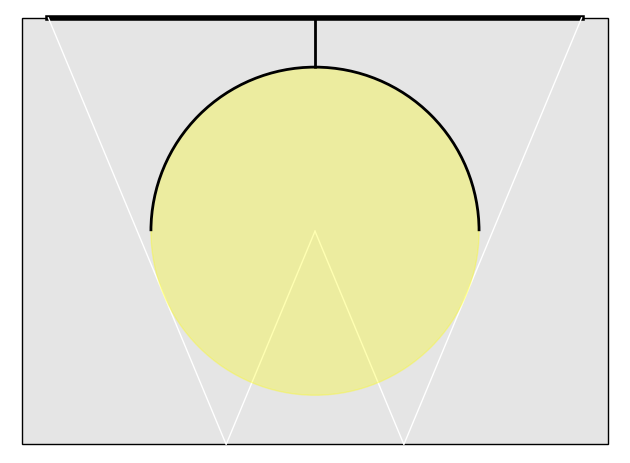

In [2]:
def figure(r, h):
    R = 3*r*h/sqrt(4*h^2-r^2)
    return (polygon([(-1.1*R,0),(1.1*R,0),(1.1*R,2*h),(-1.1*R,2*h)],
                    color="black", alpha=0.1, axes=false)
            + polygon([(-1.1*R,0),(1.1*R,0),(1.1*R,2*h),(-1.1*R,2*h)],
                    color="black", fill=false)
            + circle((0,h),r,color="yellow",alpha=0.3,fill=true)
            + arc((0,h),r,sector=(0,pi), color="black", thickness=2)
            + line([(0,2*h),(0,h+r)], color="black", thickness=2)
            + line([(-R,2*h),(R,2*h)], color="black", thickness=4)
            + line([(0,h),(R/3,0),(R,2*h)], color="white")
            +  line([(0,h),(-R/3,0),(-R,2*h)], color="white")
           )
figure(40,52)